
# Review: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>

<a id='intro'></a>
## Introduction

> * The data set is Medical Appointment No shows. <br>
> * The data set variables are self explanatory. The variables in the data set are 'Patient ID', 'AppointmentID', 'Gender', 'ScheduleDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-Show'. <br>
> * No-Show as Yes corresponds to people who did not turn up for the doctor visit and No-Show as No turned up for the doctor visit.

## Important information:

1. Explain your findings and the steps you've followed using the Markdown cells. Create Markdown cells wherever necessary
2. Double-click the markdown cells to edit them and add your inferences
3. Add necessary code cells for your task. You are not restricted to the cells created before hand.


### Steps to be followed:
1. Load the data
2. Variable Identification.
3. Check for cleanliness.
4. Trim and clean the data.
5. Feature Selection.
6. Modification of features if needed.


In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
from datetime import date
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Loading the data

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('no-show_appointments.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Create a summary of the data.
data.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [7]:
data[data['Age']<0] #Errant Data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Creating a new column in dataset Age_Group to assign age groups based on Age column. Unknown is assigned to age<0.
Different asignation are as follows: 
 1. Unknown --------------> age <0
 2. Infant -------------------> 0<=age<5
 3. Kid -----------------------> 5<=age<12
 4. Teenage ----------------> 12<=age<18
 5. Young Adult -----------> 18<=age<35
 6. Middle Age ------------> 35<=age<50
 7. Older Adult ------------> 50<=age<100
 8. Above 100 -------------> 100<=age

In [8]:
bins= [-1,0,5,12,18,35,50, 100, 120]
labels = ['unknown','Infant','Kid','Teenage','Young Adult', 'Middle Age', 'Older Adult', 'Above 100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

Minimum age in the dataset is negative(something to be taken care of) and max age is above 100.

### Variable Identification
* Identifying the target variable(dependent variable) and the predictor variables(independent variables) which affect the status of the target variable.

#### Mention your target variable(s) in this markdown cell and specify the predictor variable(s) you'll use for the analysis

### Type of Variable Classified:
#### Predictor Variables:
1. Gender
2. Age
3. Neighbourhood
4. Scholarship
5. Hipertension
6. Diabetes
7. Alcoholism
8. Handcap
9. SMS_received
10. AgeGroup
11. Time_Gap (will be created, based on ScheduledDate - AppointmentDay)
<br>

#### Target Variable (Independent Variable):
1. No-show
<br>

### Classify the features based on dataype

In [9]:
# Check the data types of each column (features)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  float64 
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  object  
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Age             110527 non-null  int64   
 6   Neighbourhood   110527 non-null  object  
 7   Scholarship     110527 non-null  int64   
 8   Hipertension    110527 non-null  int64   
 9   Diabetes        110527 non-null  int64   
 10  Alcoholism      110527 non-null  int64   
 11  Handcap         110527 non-null  int64   
 12  SMS_received    110527 non-null  int64   
 13  No-show         110527 non-null  object  
 14  AgeGroup        110527 non-null  category
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 11.9+ MB


### Write the features categorized by data types here:
### Data Types
1. int64
    1. Age
    2. AppointmentID
    3. Scholarship
    4. Hipertension
    5. Diabetes
    6. Alcoholism
    7. Handcap
    8. SMS_received
3. float64
    1. PatientId
4. object
    1. Gender
    2. ScheduledDay
    3. AppointmentDay
    4. Neighbourhood
    5. No-show
5. category
    1. AgeGroup
<br>

### Checking for missing data

In [10]:
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
AgeGroup          0
dtype: int64

Are there any missing data? _(Answer here)_

No there is no missing data.

#### Check the counts of some categorical variables and give your inference

##### Checking the number of Visitors region wise

In [11]:
#Checking the number of visitors region wise

neighbours = data['Neighbourhood'].unique()
visited = []
not_visited = []

for i in range (len(neighbours)):
    alpha = data[data['Neighbourhood']==neighbours[i]]
    beta = alpha[alpha['No-show']=='No']
    gamma = alpha[alpha['No-show']=='Yes']
    visited.append(beta['No-show'].count())
    not_visited.append(gamma['No-show'].count())

fig, ax = plt.subplots(figsize=(100,100))
index = np.arange(len(neighbours))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Neighbourhood', fontsize=80)
plt.ylabel('Peoples Count', fontsize=80)
plt.title('Based on Neighbourhood', fontsize=80)
plt.xticks(index + bar_width/2, neighbours, rotation=90, color='red', fontsize=36)


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red', rotation=90,fontsize=30)  
    
plt.legend(prop={'size':80})

plt.tight_layout()
plt.show()


##### Checking the number of Visitors based on Scholarship Status

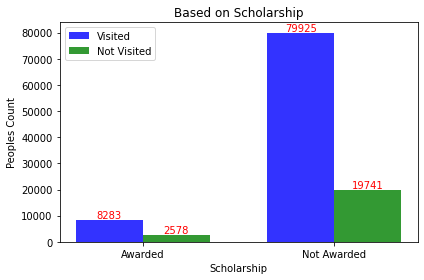

In [12]:
visited = []
not_visited = []
alpha = data[data['Scholarship']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Scholarship']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Scholarship']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Scholarship']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Scholarship')
plt.ylabel('Peoples Count')
plt.title('Based on Scholarship')
plt.xticks(index + bar_width/2, ('Awarded', 'Not Awarded'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()


##### Checking the number of Visitors based on Hypertension

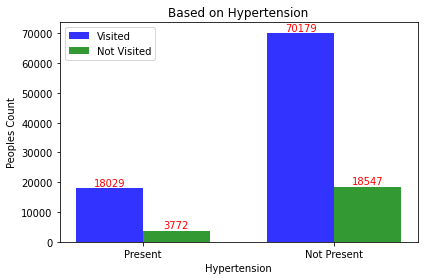

In [13]:
visited = []
not_visited = []
alpha = data[data['Hipertension']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Hipertension']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Hipertension']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Hipertension']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Hypertension')
plt.ylabel('Peoples Count')
plt.title('Based on Hypertension')
plt.xticks(index + bar_width/2, ('Present', 'Not Present'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()


##### Checking the number of Visitors based on Diabetes

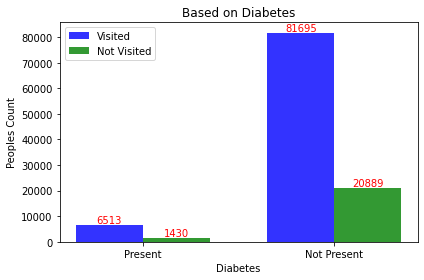

In [14]:
visited = []
not_visited = []
alpha = data[data['Diabetes']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Diabetes']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Diabetes']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Diabetes']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Diabetes')
plt.ylabel('Peoples Count')
plt.title('Based on Diabetes')
plt.xticks(index + bar_width/2, ('Present', 'Not Present'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()


##### Checking the number of Visitors based on Alcoholism

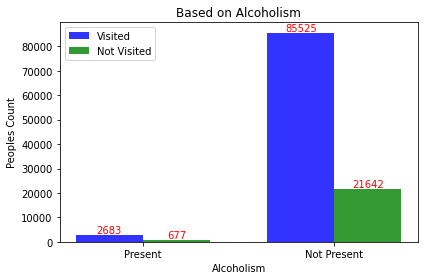

In [15]:
visited = []
not_visited = []
alpha = data[data['Alcoholism']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Alcoholism']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Alcoholism']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Alcoholism']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Alcoholism')
plt.ylabel('Peoples Count')
plt.title('Based on Alcoholism')
plt.xticks(index + bar_width/2, ('Present', 'Not Present'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()


##### Checking the number of Visitors based on Handicap

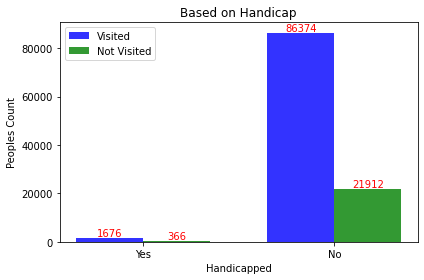

In [16]:
visited = []
not_visited = []
alpha = data[data['Handcap']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Handcap']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Handcap']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Handcap']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Handicapped')
plt.ylabel('Peoples Count')
plt.title('Based on Handicap')
plt.xticks(index + bar_width/2, ('Yes', 'No'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()

##### Checking the number of Visitors based on SMS-recieved

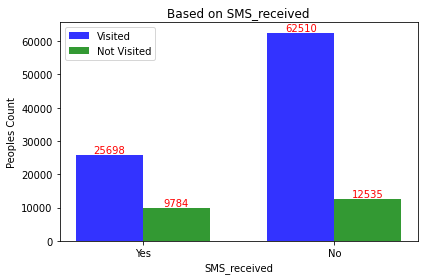

In [17]:
visited = []
not_visited = []
alpha = data[data['SMS_received']==1]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['SMS_received']==1]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['SMS_received']==0]
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['SMS_received']==0]
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('SMS_received')
plt.ylabel('Peoples Count')
plt.title('Based on SMS_received')
plt.xticks(index + bar_width/2, ('Yes', 'No'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()

##### Checking the number of Visitors based on Gender

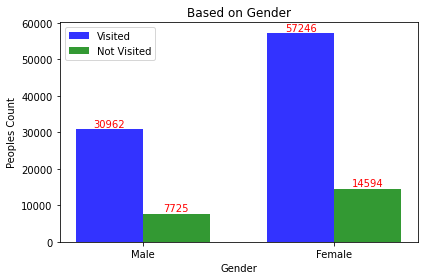

In [18]:
visited = []
not_visited = []
alpha = data[data['Gender']=='M']
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Gender']=='M']
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

alpha = data[data['Gender']=='F']
beta = alpha[alpha['No-show']=='No']
visited.append(beta['No-show'].count())


alpha = data[data['Gender']=='F']
beta = alpha[alpha['No-show']=='Yes']
not_visited.append(beta['No-show'].count())

n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Gender')
plt.ylabel('Peoples Count')
plt.title('Based on Gender')
plt.xticks(index + bar_width/2, ('Male', 'Female'))


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+10, '%d' % int(height), ha='center', va='bottom', color='red')  
    
plt.legend()

plt.tight_layout()
plt.show()

##### Checking the number of Visitors based on AgeGroups

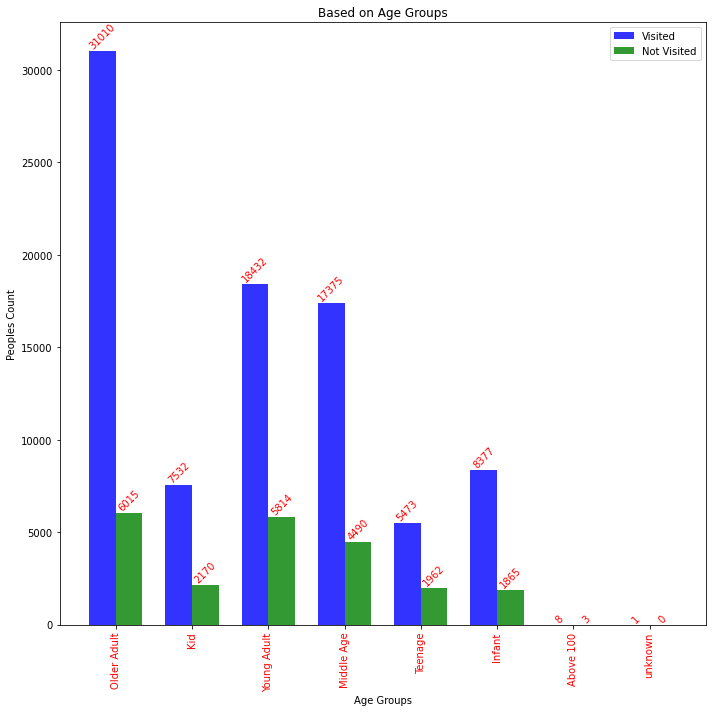

In [19]:
#Calculating the number of visitors  age group wise

groups = data['AgeGroup'].unique()
visited = []
not_visited = []

for i in range (len(groups)):
    alpha = data[data['AgeGroup']==groups[i]]
    beta = alpha[alpha['No-show']=='No']
    gamma = alpha[alpha['No-show']=='Yes']
    visited.append(beta['No-show'].count())
    not_visited.append(gamma['No-show'].count())

fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(len(groups))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, visited, bar_width,
alpha=opacity,
color='b',
label='Visited')

bar2 = plt.bar(index + bar_width, not_visited, bar_width,
alpha=opacity,
color='g',
label='Not Visited')

plt.xlabel('Age Groups')
plt.ylabel('Peoples Count')
plt.title('Based on Age Groups')
plt.xticks(index + bar_width/2, groups, rotation=90, color='red')


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+20, '%d' % int(height), ha='center', va='bottom', color='red', rotation=45)  
    
plt.legend()

plt.tight_layout()
plt.show()


<a id='cleaning'></a>
## Data Cleaning

#### The changes made to date format.
1. The Scheduled and Appointment days are in date time format.
2. Convert the date time format to Date, Week day and Month Scheduled.
3. Days, Month should normal count in integer.
4. The Week day should be coded as Monday : 0 to Sunday : 6
5. As the dataset is of year 2016, the year can be ignored.

Hint : This can be done using NumPy's datetime64 (https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

In [20]:
data['ScheduledDay'] = [sub[ : -10].split('-') for sub in data['ScheduledDay']] 
data['AppointmentDay'] = [sub[ : -10].split('-') for sub in data['AppointmentDay']] 

In [21]:
data['AppointmentDay'] = [date(int(a[0]), int(a[1]), int(a[2])) for a in data['AppointmentDay']]
data['ScheduledDay'] = [date(int(a[0]), int(a[1]), int(a[2])) for a in data['ScheduledDay']]

Added a new_column to describe to the days gap between Scheduling date and appointment date

In [22]:
data['Time_Gap'] = (data['AppointmentDay'] - data['ScheduledDay']).apply(lambda x: int(x.days))

In [23]:
data['Time_Gap'].describe(include='all')

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Time_Gap, dtype: float64

As we can see there is some ambiguity in data, as in some cases appointment is given on a date before scheduling date, hence resulting in negative time gap.

* Some of the spellings of the columns are incorrect.
* Correcting them will make it easier for the users to follow.

In [24]:
data.columns = ['PatientId', 'AppointmentID', 'Gender','ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship','Hypertension','Diabetes','Alcoholism', 'Handicap','SMS_received', 'No-show', 'AgeGroup','Time_Gap']

Rearranging the columns for better readability.

In [25]:
data = data[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay','Time_Gap', 'Age','AgeGroup', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','No-show']]

In [26]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Time_Gap,Age,AgeGroup,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,Older Adult,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,Older Adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,Older Adult,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,Kid,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,Older Adult,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check the unique values for each column.
Certain values might be of wrong format or deosn't make sense with regard to the feature. Identify and correct them if any. 

Add any number of cells you think are necessary in this section

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  float64 
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  object  
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Time_Gap        110527 non-null  int64   
 6   Age             110527 non-null  int64   
 7   AgeGroup        110527 non-null  category
 8   Neighbourhood   110527 non-null  object  
 9   Scholarship     110527 non-null  int64   
 10  Hypertension    110527 non-null  int64   
 11  Diabetes        110527 non-null  int64   
 12  Alcoholism      110527 non-null  int64   
 13  Handicap        110527 non-null  int64   
 14  SMS_received    110527 non-null  int64   
 15  No-show         110527 non-null  object  
dtypes: category(1), float64(1), int64(9), 

In [28]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Time_Gap,Age,AgeGroup,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,Older Adult,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,Older Adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,Older Adult,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,Kid,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,Older Adult,JARDIM DA PENHA,0,1,1,0,0,0,No


Gender needs to be a int64 object, as it is denoting two categroies Male or Female which can be denoted as 1 and 0 as well.

In [29]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

Now, PatientId needs to be corrected to int64

In [30]:
data['PatientId'] = data['PatientId'].astype(np.int64)

No-show needs to be a int 64 object, as it is denoting two categroies Yes and No.

In [31]:
label_encoder_noshow= LabelEncoder()
data['No-show'] = label_encoder_noshow.fit_transform(data['No-show'])

Now the last age group needs to be converted to int64, as it is denoting different categories, i will be assigning single column for each category.

And than converting these columns to dtype int64

In [32]:
data = pd.get_dummies(data=data, columns=['AgeGroup'])
data.iloc[:,15:23] = data.iloc[:,15:23].astype(np.int64)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PatientId             110527 non-null  int64 
 1   AppointmentID         110527 non-null  int64 
 2   Gender                110527 non-null  int64 
 3   ScheduledDay          110527 non-null  object
 4   AppointmentDay        110527 non-null  object
 5   Time_Gap              110527 non-null  int64 
 6   Age                   110527 non-null  int64 
 7   Neighbourhood         110527 non-null  object
 8   Scholarship           110527 non-null  int64 
 9   Hypertension          110527 non-null  int64 
 10  Diabetes              110527 non-null  int64 
 11  Alcoholism            110527 non-null  int64 
 12  Handicap              110527 non-null  int64 
 13  SMS_received          110527 non-null  int64 
 14  No-show               110527 non-null  int64 
 15  AgeGroup_unknown 

In [34]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Time_Gap,Age,Neighbourhood,Scholarship,Hypertension,...,SMS_received,No-show,AgeGroup_unknown,AgeGroup_Infant,AgeGroup_Kid,AgeGroup_Teenage,AgeGroup_Young Adult,AgeGroup_Middle Age,AgeGroup_Older Adult,AgeGroup_Above 100
0,29872499824296,5642903,0,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,...,0,0,0,0,0,0,0,0,1,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,...,0,0,0,0,0,0,0,0,1,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,...,0,0,0,0,0,0,0,0,1,0


We also need to scale our Age and Time_Gap columns, for a better fit.

In [35]:
sc_time_gap = StandardScaler()
data['Time_Gap'] = sc_time_gap.fit_transform(data['Time_Gap'].values.reshape(-1,1))

sc_age = StandardScaler()
data['Age'] = sc_time_gap.fit_transform(data['Age'].values.reshape(-1,1))

In [36]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Time_Gap,Age,Neighbourhood,Scholarship,Hypertension,...,SMS_received,No-show,AgeGroup_unknown,AgeGroup_Infant,AgeGroup_Kid,AgeGroup_Teenage,AgeGroup_Young Adult,AgeGroup_Middle Age,AgeGroup_Older Adult,AgeGroup_Above 100
0,29872499824296,5642903,0,2016-04-29,2016-04-29,-0.667568,1.077932,JARDIM DA PENHA,0,1,...,0,0,0,0,0,0,0,0,1,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,-0.667568,0.818306,JARDIM DA PENHA,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,-0.667568,1.077932,MATA DA PRAIA,0,0,...,0,0,0,0,0,0,0,0,1,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,-0.667568,-1.258708,PONTAL DE CAMBURI,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,-0.667568,0.818306,JARDIM DA PENHA,0,1,...,0,0,0,0,0,0,0,0,1,0


Write your findings **here**

In this data, 0 is assigned to Female and 1 is assigned to Male, for Gender column.

In this data, 0 is assigned for No, and 1 is assigned for Yes, for No-show column.

Age and Time_gap are scaled.

### Feature Selection

Choose the features that are best suited for the analysis and drop those which are unnecessary.

Display your final dataset at the end


In [37]:
data = data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','AgeGroup_unknown'], axis=1)


Removed AgeGroup_unknown to avoid the porblem of dummy variable.

In [38]:
data = data[['Gender', 'Time_Gap', 'Age','AgeGroup_Infant', 'AgeGroup_Kid', 'AgeGroup_Teenage', 'AgeGroup_Young Adult', 'AgeGroup_Middle Age', 'AgeGroup_Older Adult', 'AgeGroup_Above 100', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','No-show']]

In [39]:
data

,Gender,Time_Gap,Age,AgeGroup_Infant,AgeGroup_Kid,AgeGroup_Teenage,AgeGroup_Young Adult,AgeGroup_Middle Age,AgeGroup_Older Adult,AgeGroup_Above 100,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,0,-0.667568,1.077932,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,-0.667568,0.818306,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,-0.667568,1.077932,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,-0.667568,-1.258708,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.667568,0.818306,0,0,0,0,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,1.626773,0.818306,0,0,0,0,0,1,0,0,0,0,0,0,1,0
110523,0,1.626773,0.601950,0,0,0,0,0,1,0,0,0,0,0,0,1,0
110524,0,2.020088,-0.696184,0,0,0,1,0,0,0,0,0,0,0,0,1,0
110525,0,2.020088,0.039425,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [40]:
data.describe(include='all')

,Gender,Time_Gap,Age,AgeGroup_Infant,AgeGroup_Kid,AgeGroup_Teenage,AgeGroup_Young Adult,AgeGroup_Middle Age,AgeGroup_Older Adult,AgeGroup_Above 100,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,-4.937226e-17,1.404024e-16,0.092665,0.087779,0.067269,0.219367,0.197825,0.334986,0.000100,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,0.476979,1.000005e+00,1.000005e+00,0.289964,0.282975,0.250488,0.413820,0.398361,0.471988,0.009976,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.060884e+00,-1.648148e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.675680e-01,-8.259970e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-4.053577e-01,-3.845687e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.157208e-01,7.750345e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.106635e+01,3.371302e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                110527 non-null  int64  
 1   Time_Gap              110527 non-null  float64
 2   Age                   110527 non-null  float64
 3   AgeGroup_Infant       110527 non-null  int64  
 4   AgeGroup_Kid          110527 non-null  int64  
 5   AgeGroup_Teenage      110527 non-null  int64  
 6   AgeGroup_Young Adult  110527 non-null  int64  
 7   AgeGroup_Middle Age   110527 non-null  int64  
 8   AgeGroup_Older Adult  110527 non-null  int64  
 9   AgeGroup_Above 100    110527 non-null  int64  
 10  Scholarship           110527 non-null  int64  
 11  Hypertension          110527 non-null  int64  
 12  Diabetes              110527 non-null  int64  
 13  Alcoholism            110527 non-null  int64  
 14  Handicap              110527 non-null  int64  
 15  